In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.io import loadmat
import random

# Define the paths for forged and original video datasets
forged_path = Path('/kaggle/input/video-tampering-dataset/videos/Forged')
original_path = Path('/kaggle/input/video-tampering-dataset/videos/Original')
groundtruth_path = Path('/kaggle/input/video-tampering-dataset/groundtruth')

# Initialize variables for training data and frame counts
train_frames = []
forged_frames_count = 0
original_frames_count = 0

# Process forged videos
print("Processing forged videos...")
for forged_video in forged_path.glob('*.mp4'):
    print(f"Processing: {forged_video.name}")
    cap = cv2.VideoCapture(str(forged_video))
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        train_frames.append(frame)
        frame_count += 1

    forged_frames_count += frame_count
    print(f"Number of Frames: {frame_count}")
    cap.release()

print(f"Total Frames in Forged Directory: {forged_frames_count}")

# Process original videos
print("Processing original videos...")
for original_video in original_path.glob('*.mp4'):
    print(f"Processing: {original_video.name}")
    cap = cv2.VideoCapture(str(original_video))
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        train_frames.append(frame)
        frame_count += 1

    original_frames_count += frame_count
    print(f"Number of Frames: {frame_count}")
    cap.release()

print(f"Total Frames in Original Directory: {original_frames_count}")
print(f"Total Frames Processed: {len(train_frames)}")

# Define a helper function to determine if a frame is forged based on its mask
def is_forged(img):
    return int(np.any(img == 1))

# Initialize labels for the training data
labels = []

# Process ground truth data to generate labels
print("Processing ground truth data...")
for gt_file in groundtruth_path.glob('*.mat'):
    print(f"Processing: {gt_file.name}")
    mask = loadmat(str(gt_file))['GT'].reshape((-1, 240, 320))
    print(f"Number of Frames in Ground Truth: {mask.shape[0]}")

    for i in range(mask.shape[0]):
        labels.append(is_forged(mask[i]))

print(f"Total Labels from Ground Truth: {len(labels)}")

# Pad the remaining frames (original data has no forged frames) with 0 labels
labels += [0] * (len(train_frames) - len(labels))
print(f"Total Labels after Padding: {len(labels)}")

# Shuffle data and labels together
print("Shuffling data...")
combined = list(zip(train_frames, labels))
random.shuffle(combined)
train_frames[:], labels[:] = zip(*combined)

# Convert to numpy arrays for saving
print("Converting data to numpy arrays...")
Xtrain = np.array(train_frames)
Ytrain = np.array(labels, dtype='float32')

print(f"Training Data Shape: {Xtrain.shape}")
print(f"Training Labels Shape: {Ytrain.shape}")

# Save the processed data
np.save("/kaggle/working/Xtrain.npy", Xtrain)
np.save("/kaggle/working/Ytrain.npy", Ytrain)

print("Data saved successfully!")


Processing forged videos...
Processing: 01_forged.mp4
Number of Frames: 210
Processing: 04_forged.mp4
Number of Frames: 319
Processing: 06_forged.mp4
Number of Frames: 262
Processing: 05_forged.mp4
Number of Frames: 583
Processing: 09_forged.mp4
Number of Frames: 554
Processing: 10_forged.mp4
Number of Frames: 239
Processing: 02_forged.mp4
Number of Frames: 329
Processing: 08_forged.mp4
Number of Frames: 274
Processing: 03_forged.mp4
Number of Frames: 313
Processing: 07_forged.mp4
Number of Frames: 412
Total Frames in Forged Directory: 3495
Processing original videos...
Processing: 01_original.mp4
Number of Frames: 210
Processing: 07_original.mp4
Number of Frames: 412
Processing: 04_original.mp4
Number of Frames: 319
Processing: 02_original.mp4
Number of Frames: 329
Processing: 05_original.mp4
Number of Frames: 583
Processing: 09_original.mp4
Number of Frames: 554
Processing: 08_original.mp4
Number of Frames: 274
Processing: 10_original.mp4
Number of Frames: 239
Processing: 03_original

(6990, 240, 320, 3)
(6990,)


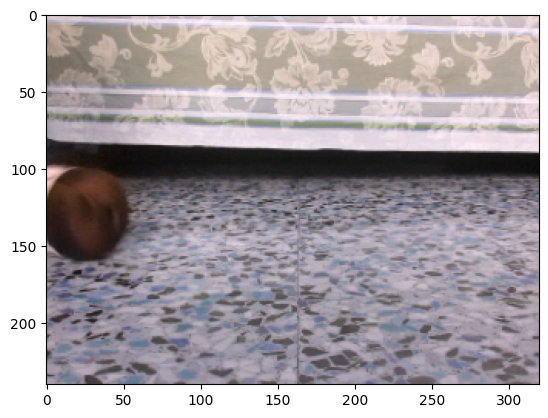

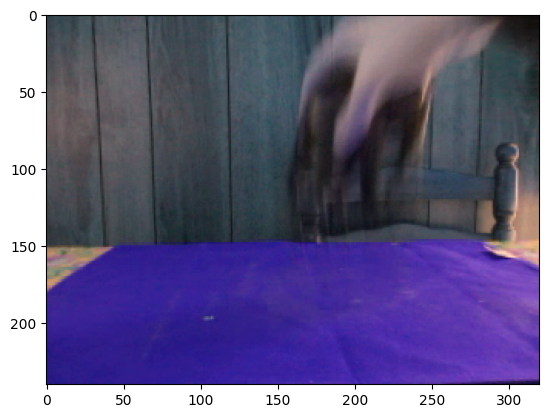

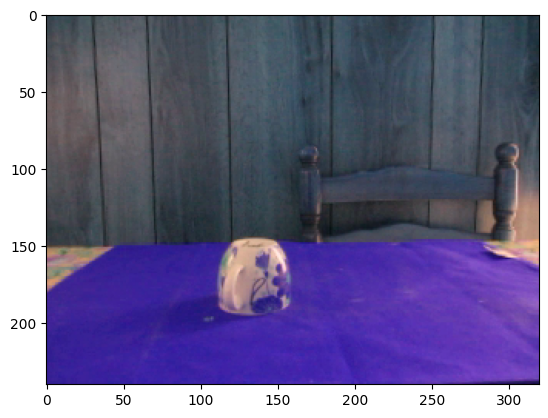

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 240, 320, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 246, 326, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 120, 160, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 120, 160, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 120, 160, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 122, 162, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 60, 80, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 60, 80, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 60, 80, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 60, 80, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 60, 80, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 60, 80, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 60, 80, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 60, 80, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 60, 80, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,718,913 (90.48 MB)

 Trainable params: 23,665,793 (90.28 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/12
175/175 ━━━━━━━━━━━━━━━━━━━━ 173s 699ms/step - accuracy: 0.7280 - loss: 0.5476 - val_accuracy: 0.7747 - val_loss: 0.4512
Epoch 2/12
175/175 ━━━━━━━━━━━━━━━━━━━━ 94s 539ms/step - accuracy: 0.7761 - loss: 0.4309 - val_accuracy: 0.7668 - val_loss: 0.5105
Epoch 3/12
175/175 ━━━━━━━━━━━━━━━━━━━━ 95s 545ms/step - accuracy: 0.7819 - loss: 0.4052 - val_accuracy: 0.7861 - val_loss: 0.3748
Epoch 4/12
175/175 ━━━━━━━━━━━━━━━━━━━━ 94s 534ms/step - accuracy: 0.8051 - loss: 0.3806 - val_accuracy: 0.7589 - val_loss: 0.5539
Epoch 5/12
175/175 ━━━━━━━━━━━━━━━━━━━━ 93s 531ms/step - accuracy: 0.8101 - loss: 0.3611 - val_accuracy: 0.7711 - val_loss: 0.4216
Epoch 6/12
175/175 ━━━━━━━━━━━━━━━━━━━━ 96s 548ms/step - accuracy: 0.7921 - loss: 0.3787 - val_accuracy: 0.7890 - val_loss: 0.3654
Epoch 7/12
175/175 ━━━━━━━━━━━━━━━━━━━━ 93s 530ms/step - accuracy: 0.8200 - loss: 0.3431 - val_accuracy: 0.7833 - val_loss: 0.3857
Epoch 8/12
175/175 ━━━━━━━━━━━━━━━━━━━━ 93s 530ms/step - accuracy: 0.8039 - loss: 

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.applications.resnet50 import ResNet50
from keras.layers import Dropout, GlobalAveragePooling2D, Dense
from keras.optimizers import Adam
from keras.models import Model
from keras.callbacks import ModelCheckpoint

# Load preprocessed training data
Xtrain = np.load("/kaggle/working/Xtrain.npy")
Ytrain = np.load("/kaggle/working/Ytrain.npy")

# Display shapes of the training data
print(Xtrain.shape)  # Shape of the input video frames
print(Ytrain.shape)  # Shape of the labels

# Visualize a few random training examples
for i in range(3):
    r = np.random.randint(Xtrain.shape[0])  # Select a random index
    plt.imshow(Xtrain[r])  # Display the frame
    plt.show()

# Define the ResNet model
# Load ResNet50 without the top layer, using ImageNet weights
model = ResNet50(input_shape=(240, 320, 3), include_top=False, weights='imagenet')

# Add custom layers for binary classification
dr = Dropout(0.2)(model.output)  # Dropout layer for regularization
gap1 = GlobalAveragePooling2D()(dr)  # Global average pooling layer
fc1 = Dense(64, activation='relu')(gap1)  # Fully connected layer with ReLU activation
fc2 = Dense(1, activation='sigmoid')(fc1)  # Fully connected layer for binary output

# Create the new model
model_new = Model(inputs=model.input, outputs=fc2)

# Print the model summary
model_new.summary()

# Compile the model with the correct optimizer argument
adam = Adam(learning_rate=1e-4)  # Optimizer with a low learning rate
model_new.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Set up a checkpoint to save the best model during training
checkpoint = ModelCheckpoint(
    "/kaggle/working/videoforgerymodel.keras",
    save_best_only=True
)

# Train the model
hist = model_new.fit(
    Xtrain, Ytrain,
    batch_size=32,  # Number of samples per batch
    epochs=12,  # Number of training epochs
    validation_split=0.2,  # Fraction of data used for validation
    callbacks=[checkpoint]  # Save the best model
)


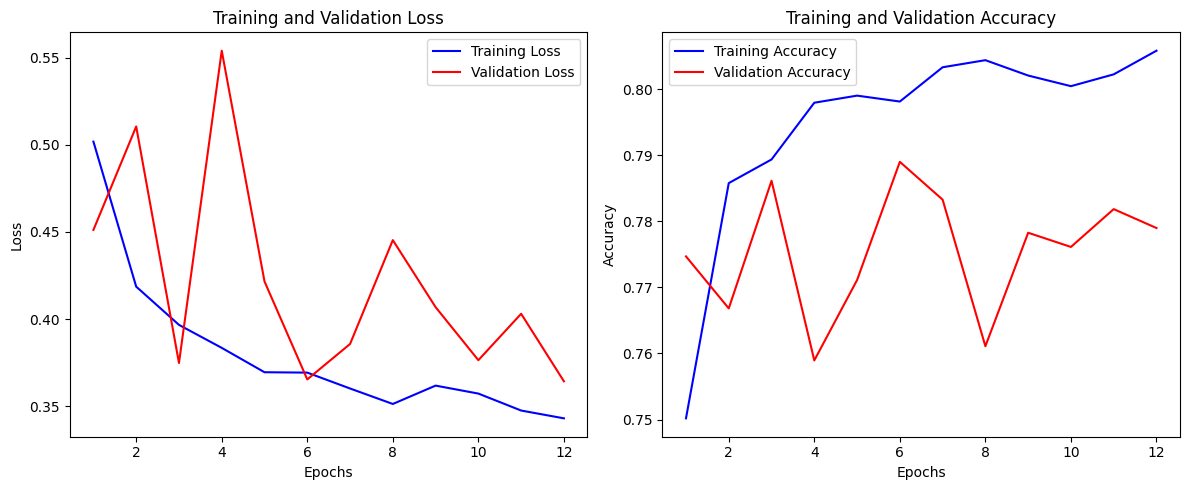

In [5]:
import matplotlib.pyplot as plt

# Extract values from the training history
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
# Save the model after training as videoforgerymodel.h5
model_new.save("/kaggle/working/videoforgerymodel.h5")


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
Xtest = np.load("/kaggle/working/Xtrain.npy")
Ytest = np.load("/kaggle/working/Ytrain.npy")
print(Xtest.shape)
print(Ytest.shape)

(6990, 240, 320, 3)
(6990,)


In [7]:
model = load_model("/kaggle/working/videoforgerymodel.h5")

In [8]:
outputs = model.predict(Xtest)

219/219 ━━━━━━━━━━━━━━━━━━━━ 38s 163ms/step


In [9]:
outputs = outputs.reshape((-1))
print(outputs.shape)

(6990,)


In [10]:
for i in range(outputs.shape[0]):
    if outputs[i] > 0.5:
        outputs[i] = 1
    else:
        outputs[i] = 0
print(outputs)

[1. 0. 1. ... 0. 0. 0.]


In [11]:
positiveCount = 0
for i in range(Xtest.shape[0]):
    if outputs[i] == Ytest[i]:
        positiveCount +=1

print("Test Accuracy = ",positiveCount/Ytest.shape[0])

Test Accuracy =  0.8071530758226038


              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      5273
         1.0       0.70      0.38      0.49      1717

    accuracy                           0.81      6990
   macro avg       0.76      0.66      0.69      6990
weighted avg       0.79      0.81      0.79      6990



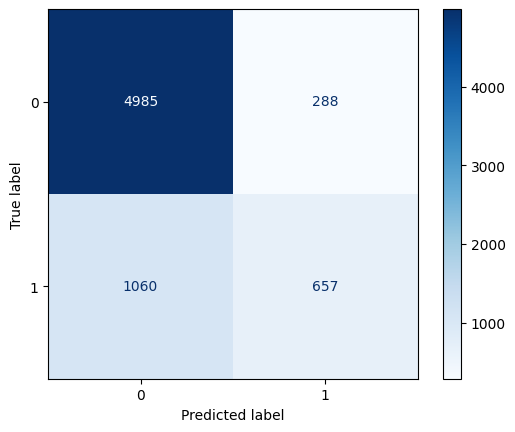

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'outputs' and 'Ytest' are defined
print(classification_report(Ytest, outputs))

# Calculate the confusion matrix
cm = confusion_matrix(Ytest, outputs)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


In [13]:
cnf_matrix = confusion_matrix(outputs,Ytest)
print(cnf_matrix)

[[4985 1060]
 [ 288  657]]


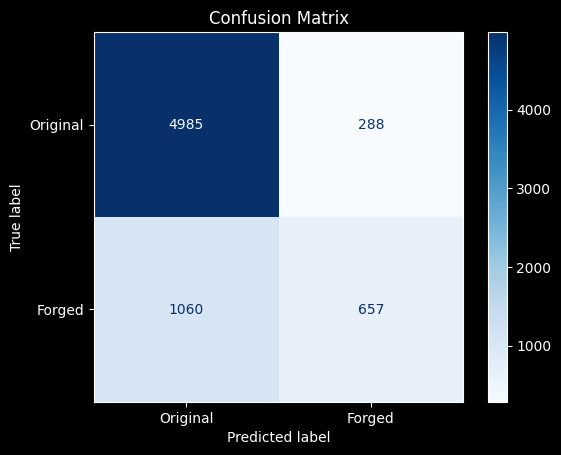

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'outputs' and 'Ytest' are your predicted and true values
cnf_matrix = confusion_matrix(Ytest, outputs)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=["Original", "Forged"])

# Plot the confusion matrix
plt.style.use('dark_background')
disp.plot(cmap="Blues", values_format='d')

plt.title("Confusion Matrix")
plt.show()


              precision    recall  f1-score   support

    Real (0)       0.82      0.95      0.88      5273
  Forged (1)       0.70      0.38      0.49      1717

    accuracy                           0.81      6990
   macro avg       0.76      0.66      0.69      6990
weighted avg       0.79      0.81      0.79      6990



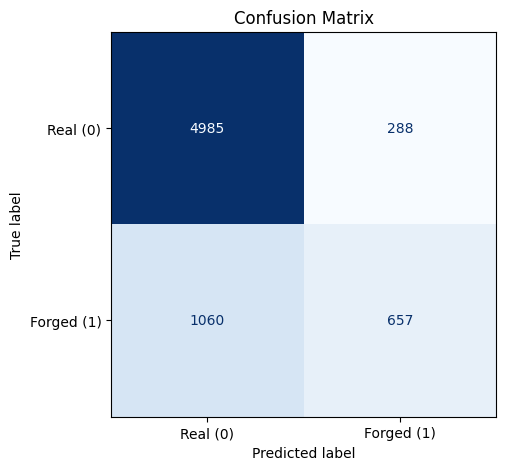

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Convert probabilities to binary labels (if outputs are probabilities)
threshold = 0.5  
binary_outputs = (outputs >= threshold).astype(int)

# Print classification report
print(classification_report(Ytest, binary_outputs, target_names=["Real (0)", "Forged (1)"]))

# Compute confusion matrix
cm = confusion_matrix(Ytest, binary_outputs)

# Set a white background for the confusion matrix plot
plt.style.use('default')  # Ensures no dark background
fig, ax = plt.subplots(figsize=(6, 5))  # Adjust figure size

# Display confusion matrix with proper labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real (0)", "Forged (1)"])
disp.plot(cmap='Blues', ax=ax, colorbar=False)  # Remove colorbar if not needed

# Make sure the grid/background stays white
plt.gca().set_facecolor('white')  # Set white background
plt.title("Confusion Matrix")
plt.show()


In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
vid_src = "/kaggle/input/video-tampering-dataset/videos/Original/02_original.mp4"
vid = []

sumframes =0
cap= cv2.VideoCapture(vid_src)
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    sumframes +=1
    vid.append(frame)
cap.release()
    
print("No. Of Frames in the Video: ",sumframes)

Xtest = np.array(vid)
#print(Xtest.shape)
from keras.models import load_model
model = load_model("/kaggle/working/videoforgerymodel.h5")

output = model.predict(Xtest)
output = output.reshape((-1))

results = []
for i in output:
    if i>0.5:
        results.append(1)
    else:
        results.append(0)
#print(len(results))
#print(results)
forge_flag = 0
for i in results:
    if i == 1:
        forge_flag = 1
        break
        
if forge_flag == 0:
    print("The video is not forged")
    
else:
    print("The video is forged")
    print("Number of Forged Frames in the video: ",sum(results))

No. Of Frames in the Video:  329
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 340ms/step
The video is not forged


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
vid_src = "/kaggle/input/video-tampering-dataset/videos/Forged/08_forged.mp4"
vid = []
target_height, target_width = 240, 320  # Define target dimensions (height, width)

sumframes =0
cap= cv2.VideoCapture(vid_src)
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    sumframes +=1
    vid.append(frame)
cap.release()
    
print("No. Of Frames in the Video: ",sumframes)

Xtest = np.array(vid)
#print(Xtest.shape)
from keras.models import load_model
model = load_model("/kaggle/working/videoforgerymodel.h5")

output = model.predict(Xtest)
output = output.reshape((-1))

results = []
for i in output:
    if i>0.5:
        results.append(1)
    else:
        results.append(0)
#print(len(results))
#print(results)
forge_flag = 0
for i in results:
    if i == 1:
        forge_flag = 1
        break
        
if forge_flag == 0:
    print("The video is not forged")
    
else:
    print("The video is forged")
    print("Number of Forged Frames in the video: ",sum(results))

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
vid_src = "/kaggle/input/video-tampering-dataset/videos/Forged/08_forged.mp4"
vid = []

sumframes =0
cap= cv2.VideoCapture(vid_src)
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    sumframes +=1
    vid.append(frame)
cap.release()
    
print("No. Of Frames in the Video: ",sumframes)

Xtest = np.array(vid)
#print(Xtest.shape)
from keras.models import load_model
model = load_model("/kaggle/working/videoforgerymodel.h5")

output = model.predict(Xtest)
output = output.reshape((-1))

results = []
for i in output:
    if i>0.5:
        results.append(1)
    else:
        results.append(0)
#print(len(results))
#print(results)
forge_flag = 0
for i in results:
    if i == 1:
        forge_flag = 1
        break
        
if forge_flag == 0:
    print("The video is not forged")
    
else:
    print("The video is forged")
    print("Number of Forged Frames in the video: ",sum(results))

No. Of Frames in the Video:  274
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step
The video is forged
Number of Forged Frames in the video:  32


In [20]:
import cv2
import numpy as np
from keras.models import load_model

# Video source and model path
vid_src = "/kaggle/input/video-forgery-datasets/VDFF-3D-DATASET/COPY3D-FRAME-SEQUENCE/forged/13.mp4"
model_path = "/kaggle/working/videoforgerymodel.h5"

# Parameters
target_height, target_width = 240, 320

# Read and preprocess video frames
vid = []
sumframes = 0
cap = cv2.VideoCapture(vid_src)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Resize frame to target dimensions
    frame = cv2.resize(frame, (target_width, target_height))
    sumframes += 1
    vid.append(frame)

cap.release()
print("No. Of Frames in the Video: ", sumframes)

# Convert video frames to NumPy array
Xtest = np.array(vid)
print("Shape of Xtest: ", Xtest.shape)

# Load the pre-trained model
model = load_model(model_path)

# Perform prediction
output = model.predict(Xtest, batch_size=32)
output = output.reshape((-1))

# Analyze results
results = [1 if i > 0.5 else 0 for i in output]

# Check for forged frames
if any(results):
    print("The video is forged")
    print("Number of Forged Frames in the video: ", sum(results))
else:
    print("The video is not forged")


No. Of Frames in the Video:  284
Shape of Xtest:  (284, 240, 320, 3)
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 463ms/step
The video is forged
Number of Forged Frames in the video:  89


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.io import loadmat
import random

# Define the paths for forged and original video datasets
forged_path = Path('/kaggle/input/video-tampering-dataset/videos/Forged')
original_path = Path('/kaggle/input/video-tampering-dataset/videos/Original')
groundtruth_path = Path('/kaggle/input/video-tampering-dataset/groundtruth')

# Initialize variables for training data and frame counts
train_frames = []
forged_frames_count = 0
original_frames_count = 0

# Process forged videos
print("Processing forged videos...")
for forged_video in forged_path.glob('*.mp4'):
    print(f"Processing: {forged_video.name}")
    cap = cv2.VideoCapture(str(forged_video))
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        train_frames.append(frame)
        frame_count += 1

    forged_frames_count += frame_count
    print(f"Number of Frames: {frame_count}")
    cap.release()

print(f"Total Frames in Forged Directory: {forged_frames_count}")

# Process original videos
print("Processing original videos...")
for original_video in original_path.glob('*.mp4'):
    print(f"Processing: {original_video.name}")
    cap = cv2.VideoCapture(str(original_video))
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        train_frames.append(frame)
        frame_count += 1

    original_frames_count += frame_count
    print(f"Number of Frames: {frame_count}")
    cap.release()

print(f"Total Frames in Original Directory: {original_frames_count}")
print(f"Total Frames Processed: {len(train_frames)}")

# Define a helper function to determine if a frame is forged based on its mask
def is_forged(img):
    return int(np.any(img == 1))

# Initialize labels for the training data
labels = []

# Process ground truth data to generate labels
print("Processing ground truth data...")
for gt_file in groundtruth_path.glob('*.mat'):
    print(f"Processing: {gt_file.name}")
    mask = loadmat(str(gt_file))['GT'].reshape((-1, 240, 320))
    print(f"Number of Frames in Ground Truth: {mask.shape[0]}")

    for i in range(mask.shape[0]):
        labels.append(is_forged(mask[i]))

print(f"Total Labels from Ground Truth: {len(labels)}")

# Pad the remaining frames (original data has no forged frames) with 0 labels
labels += [0] * (len(train_frames) - len(labels))
print(f"Total Labels after Padding: {len(labels)}")

# Shuffle data and labels together
print("Shuffling data...")
combined = list(zip(train_frames, labels))
random.shuffle(combined)
train_frames[:], labels[:] = zip(*combined)

from sklearn.model_selection import train_test_split

# Load original dataset (assuming train_frames and labels are already loaded)
X = np.array(train_frames)  # Feature frames
Y = np.array(labels, dtype='float32')  # Labels

# Split into training (80%), validation (10%), and test (10%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

# Save datasets for future use
np.save("/kaggle/working/X_train.npy", X_train)
np.save("/kaggle/working/Y_train.npy", Y_train)
np.save("/kaggle/working/X_val.npy", X_val)
np.save("/kaggle/working/Y_val.npy", Y_val)
np.save("/kaggle/working/X_test.npy", X_test)
np.save("/kaggle/working/Y_test.npy", Y_test)

print(f"Training Set: {X_train.shape}, {Y_train.shape}")
print(f"Validation Set: {X_val.shape}, {Y_val.shape}")
print(f"Test Set: {X_test.shape}, {Y_test.shape}")

Processing forged videos...
Processing: 01_forged.mp4
Number of Frames: 210
Processing: 04_forged.mp4
Number of Frames: 319
Processing: 06_forged.mp4
Number of Frames: 262
Processing: 05_forged.mp4
Number of Frames: 583
Processing: 09_forged.mp4
Number of Frames: 554
Processing: 10_forged.mp4
Number of Frames: 239
Processing: 02_forged.mp4
Number of Frames: 329
Processing: 08_forged.mp4
Number of Frames: 274
Processing: 03_forged.mp4
Number of Frames: 313
Processing: 07_forged.mp4
Number of Frames: 412
Total Frames in Forged Directory: 3495
Processing original videos...
Processing: 01_original.mp4
Number of Frames: 210
Processing: 07_original.mp4
Number of Frames: 412
Processing: 04_original.mp4
Number of Frames: 319
Processing: 02_original.mp4
Number of Frames: 329
Processing: 05_original.mp4
Number of Frames: 583
Processing: 09_original.mp4
Number of Frames: 554
Processing: 08_original.mp4
Number of Frames: 274
Processing: 10_original.mp4
Number of Frames: 239
Processing: 03_original

(6990, 240, 320, 3)
(6990,)


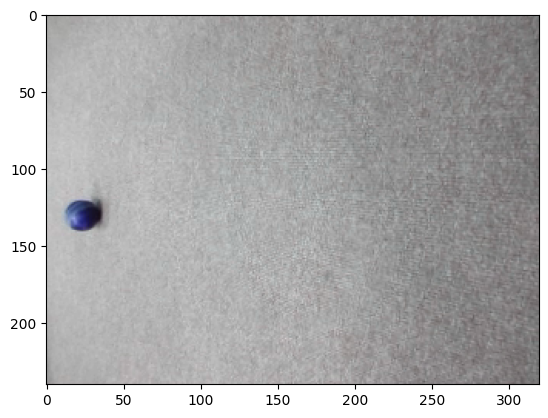

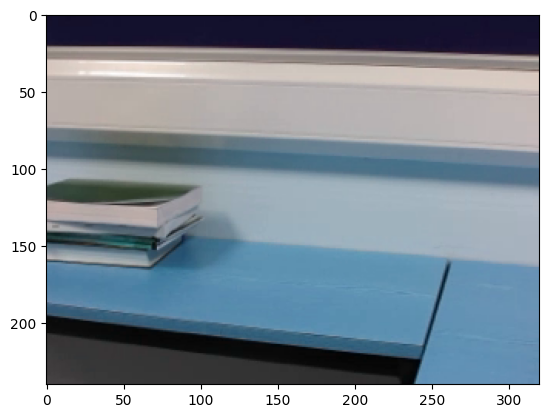

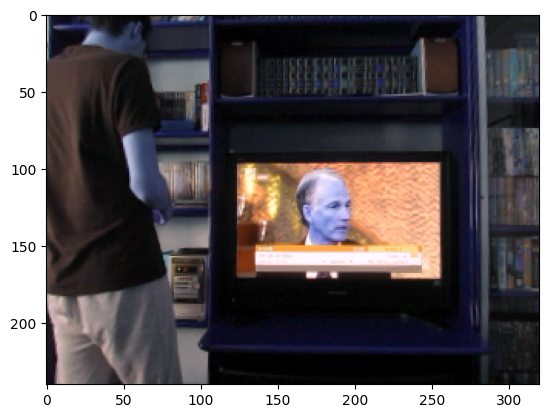

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 240, 320, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 246, 326, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 120, 160, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 120, 160, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 120, 160, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 122, 162, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 60, 80, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 60, 80, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 60, 80, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 60, 80, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 60, 80, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 60, 80, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 60, 80, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 60, 80, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 60, 80, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,718,913 (90.48 MB)

 Trainable params: 23,665,793 (90.28 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/12
219/219 ━━━━━━━━━━━━━━━━━━━━ 216s 689ms/step - accuracy: 0.7310 - loss: 0.5457 - val_accuracy: 0.7821 - val_loss: 0.4284
Epoch 2/12
219/219 ━━━━━━━━━━━━━━━━━━━━ 121s 554ms/step - accuracy: 0.7856 - loss: 0.4226 - val_accuracy: 0.7893 - val_loss: 0.4187
Epoch 3/12
219/219 ━━━━━━━━━━━━━━━━━━━━ 120s 548ms/step - accuracy: 0.7831 - loss: 0.3962 - val_accuracy: 0.8089 - val_loss: 0.3581
Epoch 4/12
219/219 ━━━━━━━━━━━━━━━━━━━━ 119s 542ms/step - accuracy: 0.7929 - loss: 0.3833 - val_accuracy: 0.8107 - val_loss: 0.3733
Epoch 5/12
219/219 ━━━━━━━━━━━━━━━━━━━━ 120s 548ms/step - accuracy: 0.7919 - loss: 0.3743 - val_accuracy: 0.8214 - val_loss: 0.3514
Epoch 6/12
219/219 ━━━━━━━━━━━━━━━━━━━━ 118s 539ms/step - accuracy: 0.7980 - loss: 0.3607 - val_accuracy: 0.8214 - val_loss: 0.3615
Epoch 7/12
219/219 ━━━━━━━━━━━━━━━━━━━━ 120s 549ms/step - accuracy: 0.7988 - loss: 0.3543 - val_accuracy: 0.8214 - val_loss: 0.3306
Epoch 8/12
219/219 ━━━━━━━━━━━━━━━━━━━━ 118s 540ms/step - accuracy: 0.7938 -

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.applications.resnet50 import ResNet50
from keras.layers import Dropout, GlobalAveragePooling2D, Dense
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.models import Model
from keras.callbacks import ModelCheckpoint

# Load preprocessed training data
Xtrain = np.load("/kaggle/working/Xtrain.npy")
Ytrain = np.load("/kaggle/working/Ytrain.npy")

# Display shapes of the training data
print(Xtrain.shape)  # Shape of the input video frames
print(Ytrain.shape)  # Shape of the labels

# Visualize a few random training examples
for i in range(3):
    r = np.random.randint(Xtrain.shape[0])  # Select a random index
    plt.imshow(Xtrain[r])  # Display the frame
    plt.show()

# Define the ResNet model
# Load ResNet50 without the top layer, using ImageNet weights
model = ResNet50(input_shape=(240, 320, 3), include_top=False, weights='imagenet')

# Add custom layers for binary classification
dr = Dropout(0.2)(model.output)  # Dropout layer for regularization
gap1 = GlobalAveragePooling2D()(dr)  # Global average pooling layer
fc1 = Dense(64, activation='relu')(gap1)  # Fully connected layer with ReLU activation
fc2 = Dense(1, activation='sigmoid')(fc1)  # Fully connected layer for binary output

# Create the new model
model_new = Model(inputs=model.input, outputs=fc2)

# Print the model summary
model_new.summary()

# Compile the model with the correct optimizer argument
adam = Adam(learning_rate=1e-4)  # Optimizer with a low learning rate
model_new.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Set up a checkpoint to save the best model during training
checkpoint = ModelCheckpoint(
    "/kaggle/working/videoforgerymodel.keras",
    save_best_only=True
)

# Train the model
hist = model_new.fit(
    Xtrain, Ytrain,
    batch_size=32,  # Number of samples per batch
    epochs=12,  # Number of training epochs
    validation_data=(X_val, Y_val),  # Fraction of data used for validation
    callbacks=[checkpoint]  # Save the best model
)


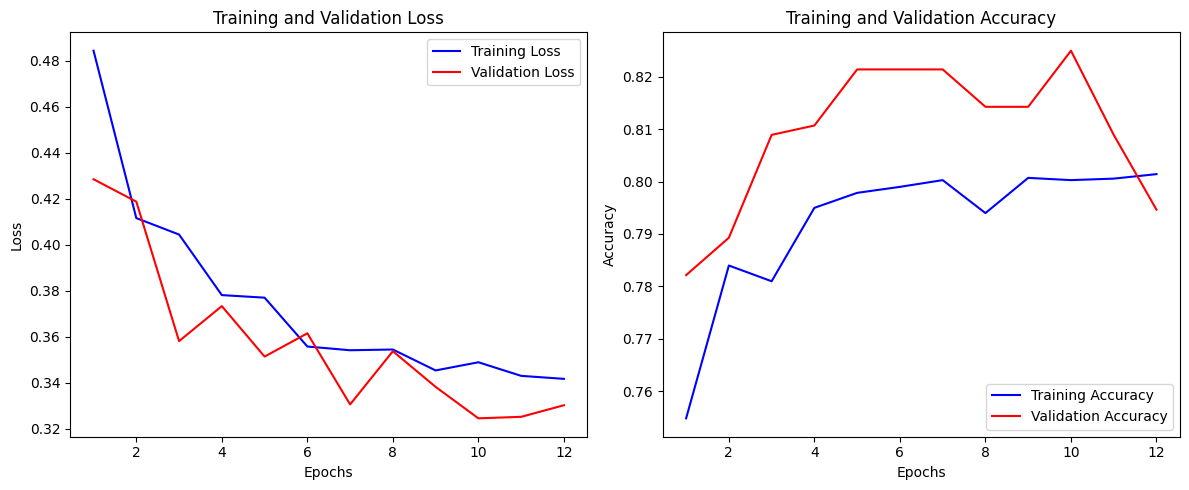

In [3]:
import matplotlib.pyplot as plt

# Extract values from the training history
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step
Classification Report:
              precision    recall  f1-score   support

    Original       0.81      0.98      0.88      1060
      Forged       0.79      0.27      0.40       338

    accuracy                           0.81      1398
   macro avg       0.80      0.62      0.64      1398
weighted avg       0.80      0.81      0.77      1398



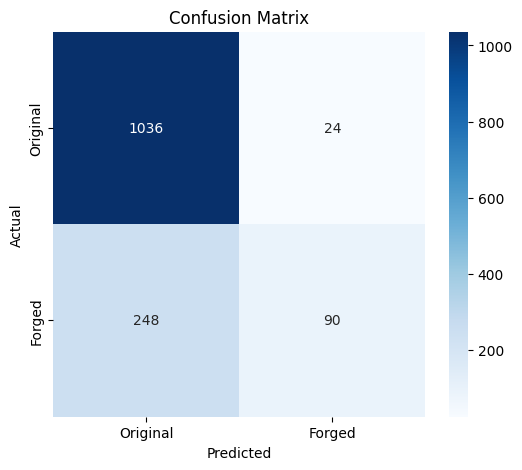

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the test dataset
X_test = np.load("/kaggle/working/X_test.npy")
Y_test = np.load("/kaggle/working/Y_test.npy")

# Load the trained model
model_new = load_model("/kaggle/working/videoforgerymodel.keras")

# Make predictions
Y_pred = model_new.predict(X_test)
Y_pred_classes = (Y_pred > 0.5).astype("int32")  # Convert probabilities to binary labels

# Generate the classification report with explicit class names
print("Classification Report:")
print(classification_report(Y_test, Y_pred_classes, target_names=['Original', 'Forged']))

# Generate and visualize the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Original', 'Forged'], yticklabels=['Original', 'Forged'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
